In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
data = pd.read_spss('./secom.SAV')

In [65]:
data.head()

,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature36

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

y = data['class']
data.drop('class', axis='columns', inplace=True)
X = data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3)
X_train = X_train.copy()

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
y_train = y_train.astype('category')
assert y_train.dtype == 'category'

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 251 to 469
Columns: 592 entries, ID to feature590
dtypes: float64(591), object(1)
memory usage: 5.0+ MB


In [70]:
X_train.head()

,ID,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feat

In [71]:
X_train.describe()

,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,fea

### Changing timestamp to DateTime

In [72]:
X_train['timestamp'] = pd.to_datetime(X_train['timestamp'])

In [73]:
X_train.describe(exclude='number')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,timestamp
count,1096
unique,1080
top,2008-03-09 18:16:00
freq,2
first,2008-01-08 02:02:00
last,2008-12-10 08:19:00


In [74]:
## Storing features with Categorical Values 
categorical_features = []
for col in X_train.columns:
    if(X_train[col].unique().size <= 3):
        if(len(categorical_features) == 0):
            categorical_features =  X_train[col]
        else:
            categorical_features = pd.concat([categorical_features, X_train[col]], axis=1)
        X_train.drop(col, axis=1, inplace=True)

In [75]:
categorical_features.shape

(1096, 122)

### Searching and Dropping for useless features with mean and max values of Zero , STD = 0

isolating the target column, we start with 122 columns 

In [76]:
columns_min_max_cero = (np.logical_and(categorical_features.min() == 0, categorical_features.max() == 0))

In [77]:
constant_columns_delete = categorical_features.loc[:, columns_min_max_cero].columns

In [78]:
categorical_features.drop(constant_columns_delete, axis=1, inplace=True)

after deleting columns with no variance we end up with 10 columns

In [79]:
categorical_features.value_counts()

feature006  feature043  feature050  feature070  feature075  feature207  feature210  feature343  feature348  feature479
100.0       70.0        1.0         1.0         0.0000      0.0         0.00        0.0000      0.0000      0.0           1082
                                                4.1955      2.0         46.15       0.4472      13.9147     200.0            1
dtype: int64

In [80]:
categorical_features['feature075'].loc[categorical_features['feature075'].isna()]

846    NaN
1206   NaN
814    NaN
1234   NaN
995    NaN
Name: feature075, dtype: float64

In [81]:
categorical_features.describe()

,feature006,feature043,feature050,feature070,feature075,feature207,feature210,feature343,feature348,feature479
count,1088.0,1095.0,1095.0,1091.0,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,100.0,70.0,1.0,1.0,0.003846,0.001833,0.042301,0.000410,0.012754,0.183318
std,0.0,0.0,0.0,0.0,0.127020,0.060550,1.397202,0.013539,0.421271,6.055048
min,100.0,70.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.0,70.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.0,70.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.0,70.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.0,70.0,1.0,1.0,4.195500,2.000000,46.150000,0.447200,13.914700,200.000000


In [82]:
categorical_features['feature479'].value_counts()

0.0      1090
200.0       1
Name: feature479, dtype: int64

After reviewing the remaining 11 columns , it was found out that they have low variance with few nulls and unique values unbalanced

### Feature Selection

### Now I look for null values overpassing the 55% of data on the remaining columns which are numerical features

In [83]:
numericalFeatures = X_train.iloc[:,2:-1]

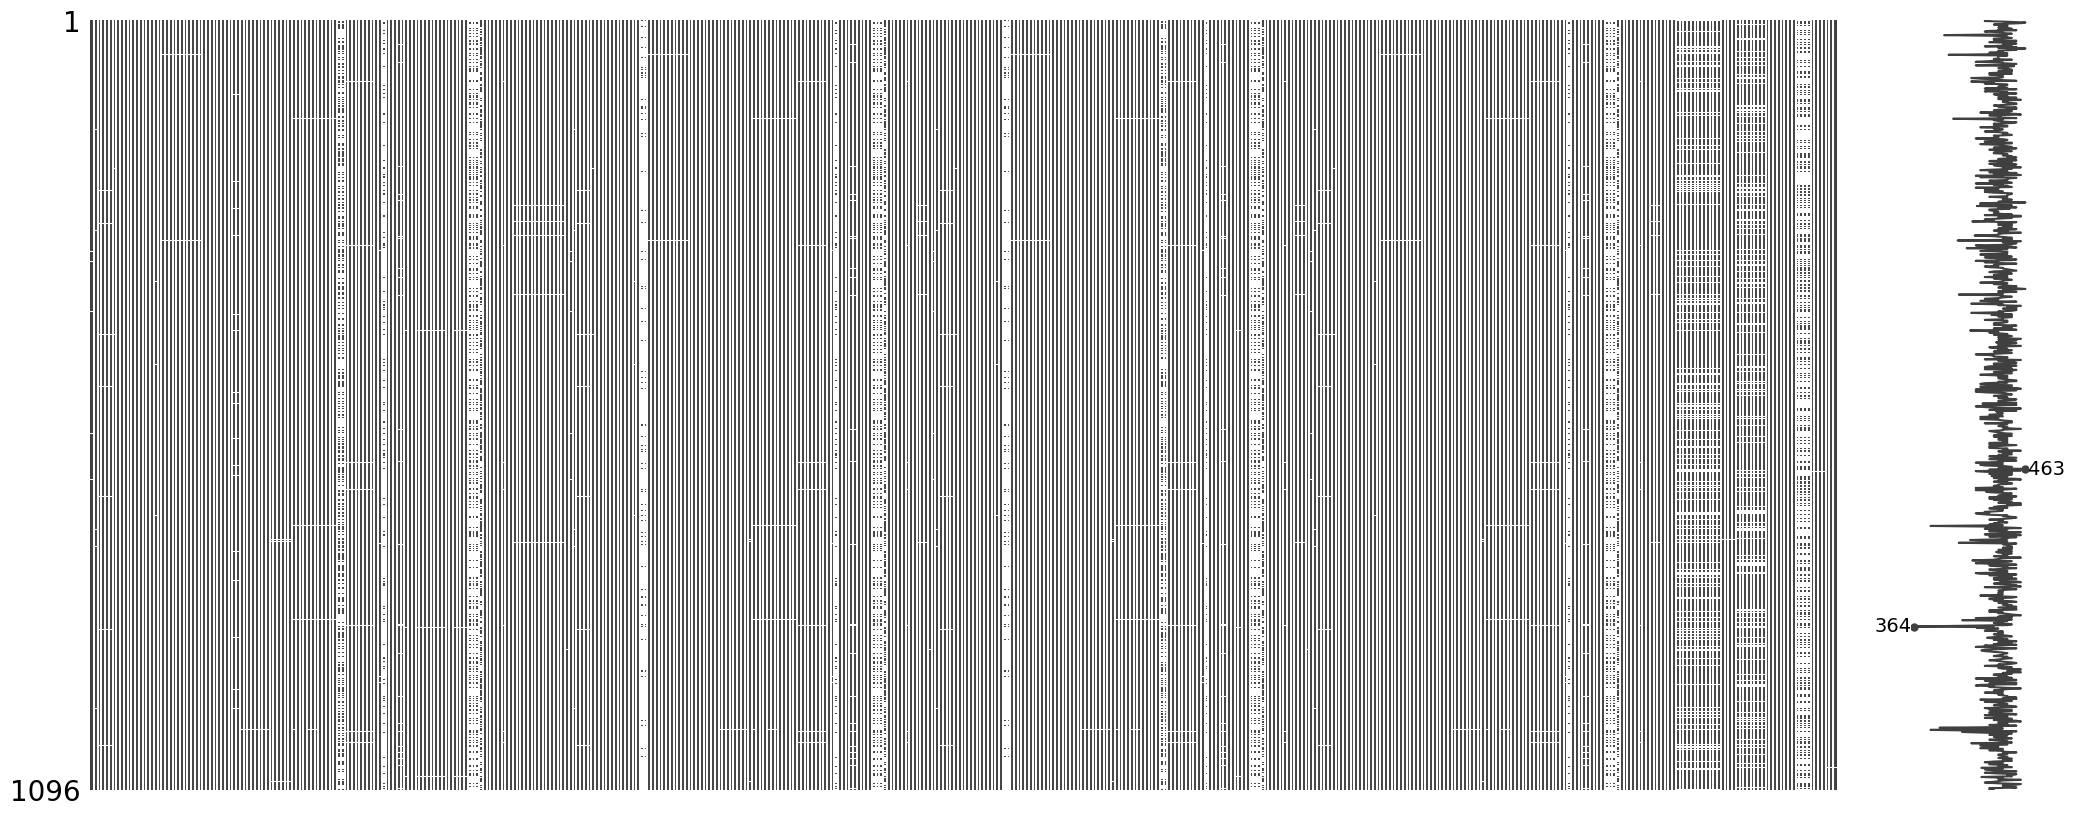

In [84]:
import missingno as msno

msno.matrix(numericalFeatures.head(1000000))
plt.show()

In [85]:
#Checking if there is a column with more than 55% values missing or NaN
num_of_features_to_delete = 0
for col in numericalFeatures.columns:
    if (numericalFeatures[col].isna().sum() > 700):
        num_of_features_to_delete +=1
        numericalFeatures.drop(col, axis=1, inplace=True)
        print(col)

feature086
feature110
feature111
feature112
feature158
feature159
feature221
feature245
feature246
feature247
feature293
feature294
feature359
feature383
feature384
feature385
feature493
feature517
feature518
feature519


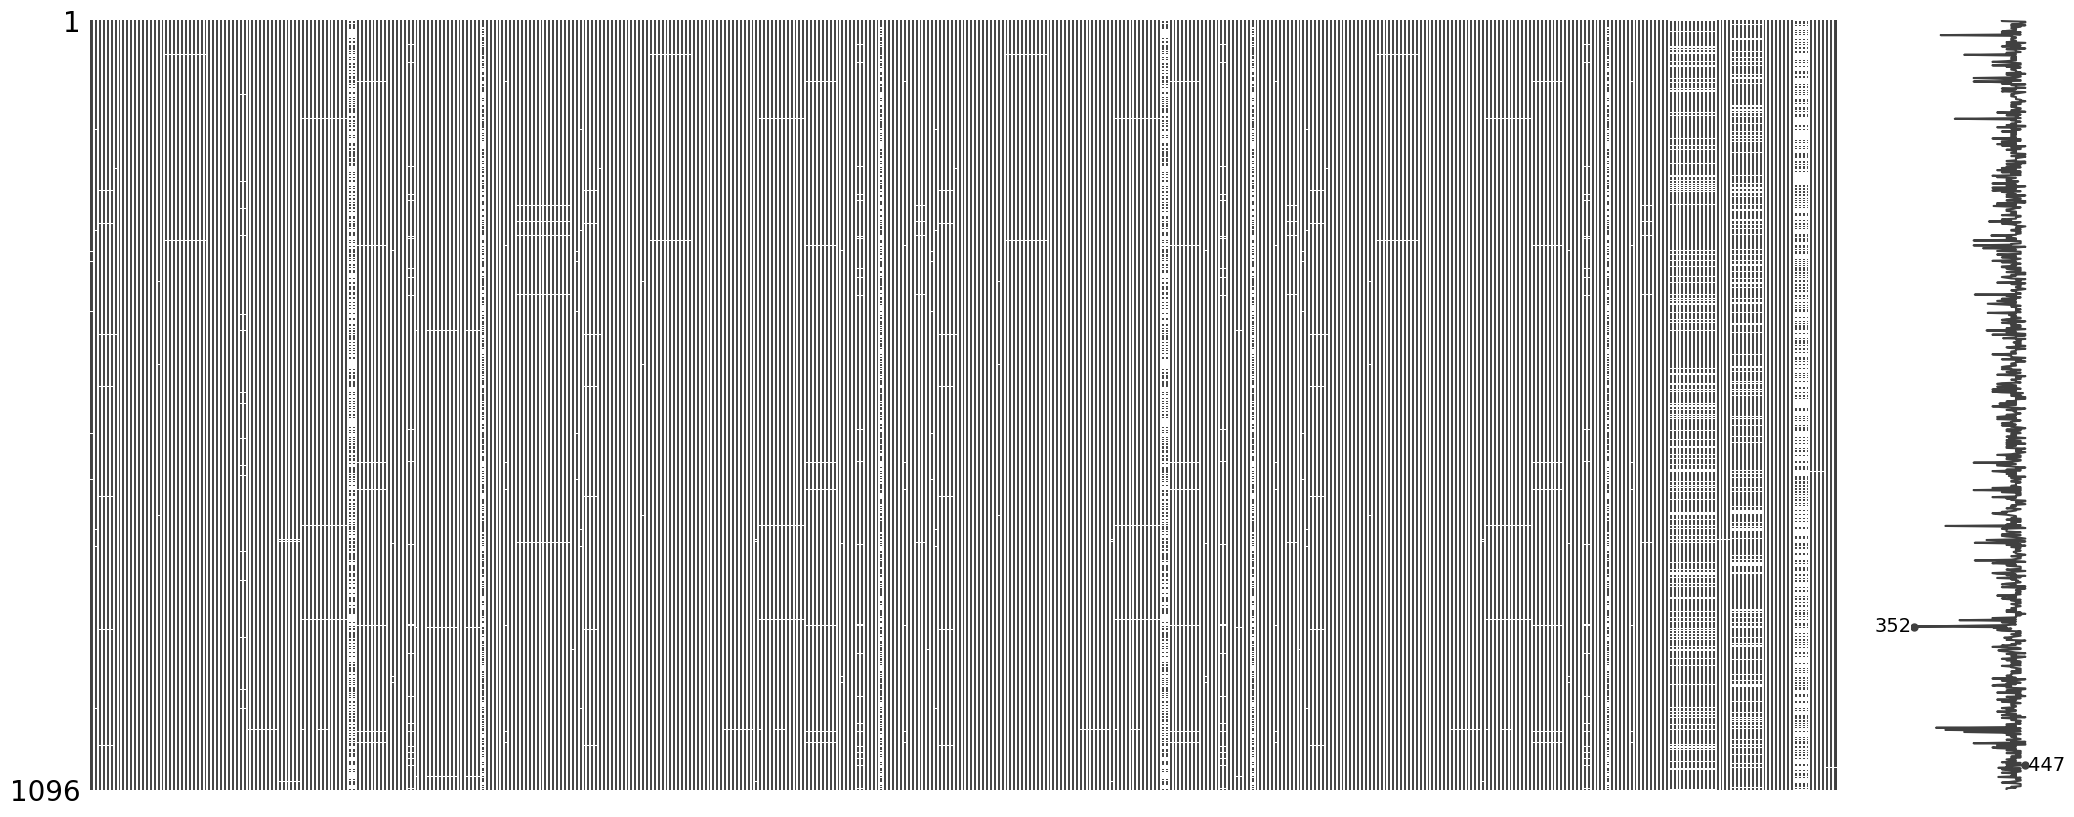

In [86]:
msno.matrix(numericalFeatures)
plt.show()

In [87]:
numericalFeatures.isna().sum().sort_values(ascending=False)

feature579    665
feature580    665
feature581    665
feature582    665
feature347    569
             ... 
feature223      0
feature224      0
feature249      0
feature250      0
feature281      0
Length: 447, dtype: int64

After deleting columns with nulls more than 45% of missing values, the data now has only 436 features

### Variance

In [88]:
X_train.drop(['ID', 'timestamp'], axis='columns', inplace=True)

In [89]:
normalized_df = X_train / X_train.mean()

In [90]:
normalized_df.var()[normalized_df.var().sort_values() > 0.005]

feature004        0.100752
feature005      199.455017
feature010      334.562641
feature011    16381.134728
feature015        0.096844
                  ...     
feature586        1.828000
feature587        0.339559
feature588        0.274562
feature589        0.288181
feature590        0.896620
Length: 399, dtype: float64

In [91]:
sel = VarianceThreshold(threshold=0.005)
sel.fit(normalized_df)

VarianceThreshold(threshold=0.005)

In [92]:
mask = sel.get_support()

In [93]:
mask

array([False, False, False,  True,  True, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,

In [94]:
X_train = X_train.loc[:, mask]

In [95]:
X_train.describe()

,feature004,feature005,feature010,feature011,feature015,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature030,feature031,feature032,feature034,feature041,feature042,feature048,feature052,feature060,feature063,feature064,feature065,feature066,feature068,feature072,feature073,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature115,feature123,feature126,feature127,feature128,feature129,feature130,feature131,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature208,feature209,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature344,feature345,feature346,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature544,feature545,feature546,feature547,feature550,feature551,featur

### Feature removal based on relation among variables

In [96]:
X_train.corr() == 0

,feature004,feature005,feature010,feature011,feature015,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature030,feature031,feature032,feature034,feature041,feature042,feature048,feature052,feature060,feature063,feature064,feature065,feature066,feature068,feature072,feature073,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature093,feature094,feature095,feature096,feature097,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature115,feature123,feature126,feature127,feature128,feature129,feature130,feature131,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature181,feature182,feature183,feature184,feature185,feature186,feature188,feature189,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature208,feature209,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature228,feature229,feature239,feature240,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature317,feature318,feature319,feature320,feature321,feature322,feature324,feature325,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature344,feature345,feature346,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature366,feature367,feature368,feature369,feature377,feature378,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature544,feature545,feature546,feature547,feature550,feature551,featur

In [97]:
mask = np.triu(np.ones_like(X_train.corr(), dtype =bool))
sns.heatmap(X_train.corr(),mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

NameError: name 'cmap' is not defined

In [98]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = X_train.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
X_train = X_train.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(X_train.shape[1]))

The reduced dataframe has 217 columns.


In [99]:
X_train

,feature004,feature010,feature011,feature015,feature022,feature023,feature024,feature025,feature027,feature028,feature030,feature031,feature032,feature034,feature041,feature042,feature048,feature052,feature060,feature063,feature064,feature065,feature066,feature068,feature072,feature073,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature096,feature097,feature099,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature126,feature127,feature128,feature129,feature130,feature131,feature135,feature201,feature211,feature240,feature271,feature274,feature275,feature276,feature279,feature281,feature282,feature286,feature293,feature295,feature296,feature297,feature298,feature299,feature301,feature302,feature303,feature304,feature317,feature325,feature336,feature337,feature338,feature339,feature341,feature345,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature363,feature366,feature367,feature368,feature369,feature377,feature378,feature386,feature388,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature545,feature546,feature547,feature553,feature556,feature557,feature558,feature559,feature561,feature562,feature564,feature568,feature569,feature570,feature572,feature576,feature577,feature578,feature586,feature587,feature589,feature590
251,995.3928,0.0064,-0.0012,13.8365,-6425.50,3123.50,-5833.00,1549.5000,1.8920,5.1478,2.3111,0.1417,4.6452,8.6829,16.53,4.970,1.3564,195.4163,16.4073,105.8809,21.8055,23.5927,31.6904,1.0780,116.1142,NaN,-0.0268,-0.0318,0.0052,-0.0681,0.0497,-0.0890,-0.0149,-0.0383,0.1949,-0.0124,0.0002,0.1339,-0.3685,0.0002,-0.0002,0.0477,-0.0041,-0.0010,-0.0009,0.0009,0.0115,0.1432,0.4704,1.1720,2.618,0.7780,3.332,-0.5677,0.7025,38.0405,18.04,0.1274,0.0036,27.5274,19.2121,51.3668,0.0394,0.0009,0.0074,0.0136,4.3510,0.0153,170.7913,316.2346,1605.8234,50.9150,0.0542,0.0450,0.9365,0.3371,0.0296,6.7371,19.6809,2.2379,9.8347,1.7039,1.5886,0.0311,17.4921,NaN,0.0411,0.0218,0.0155,0.0379,0.0274,0.0455,0.0389,0.0371,1.3533,0.0102,0.0047,0.0053,0.0034,0.0046,0.0017,0.0013,0.0130,0.0,1.3366,4.0918,2.8811,5.8689,2.3881,12.7433,7.4461,3.7412,2.5448,5.7048,385.5044,0.0000,2.6824,91.5480,1.1332,4.2418,1.5751,2.9309,3.9367,2.9866,6.3808,24.4918,61.4435,6.3892,1.9037,3.9040,43.2692,52.2353,5.3388,0.7158,0.6474,0.4682,0.5374,1.0637,0.3205,0.4236,6.2174,6.4217,7.2138,4.6968,10.5425,5.4892,3.2549,35.1736,5.8683,38.4586,6.2366,2.1448,6.4506,82.7315,26.7455,20.2712,4.4217,9.7511,6.6161,2.9140,42.2662,475.4840,154.3307,679.4258,132.4037,191.3000,103.4289,469.5652,224.9510,64.7888,2.2255,1.9403,0.2273,9.9165,16.3365,10.6074,0.0000,0.0000,124.3902,378.9474,NaN,NaN,NaN,18.5482,1.8169,0.0,20.4487,0.0854,6.7783,3.9869,2.5575,8.3543,3.1646,1.1945,9.5858,0.0026,7.1160,NaN,NaN,NaN,NaN,NaN,0.9590,0.0604,29.3353,0.7498,0.0879,3.8132,29.4844,2.3328,0.0784,1.4305,11.3765,2.7036,0.0123,0.0079,220.0378
135,1678.9669,0.0067,0.0098,6.1052,-

### Removing outliers using z-score (We can later impute them)

In [100]:
X_train.isna().sum().sort_values(ascending=False)

feature293    1000
feature519     710
feature517     710
feature518     710
feature073     569
              ... 
feature419       0
feature418       0
feature545       0
feature546       0
feature525       0
Length: 217, dtype: int64

In [101]:
data_mean, data_std  = X_train.mean(), X_train.std()
data_z_scores = ((X_train - data_mean) / data_std).abs()
data_z_scores

,feature004,feature010,feature011,feature015,feature022,feature023,feature024,feature025,feature027,feature028,feature030,feature031,feature032,feature034,feature041,feature042,feature048,feature052,feature060,feature063,feature064,feature065,feature066,feature068,feature072,feature073,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature096,feature097,feature099,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature126,feature127,feature128,feature129,feature130,feature131,feature135,feature201,feature211,feature240,feature271,feature274,feature275,feature276,feature279,feature281,feature282,feature286,feature293,feature295,feature296,feature297,feature298,feature299,feature301,feature302,feature303,feature304,feature317,feature325,feature336,feature337,feature338,feature339,feature341,feature345,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature363,feature366,feature367,feature368,feature369,feature377,feature378,feature386,feature388,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature545,feature546,feature547,feature553,feature556,feature557,feature558,feature559,feature561,feature562,feature564,feature568,feature569,feature570,feature572,feature576,feature577,feature578,feature586,feature587,feature589,feature590
251,0.900612,0.479872,0.138883,1.728280,1.303115,1.464669,1.456425,0.642482,0.257679,1.220169,0.141716,1.324464,1.812960,0.200983,2.166334,0.709041,0.921655,0.606078,1.407437,1.181269,1.044845,0.608166,0.638981,0.043416,0.399963,NaN,0.861567,0.073563,0.401925,1.158364,2.000364,1.442975,0.366252,1.239311,0.082043,0.169775,1.319154,0.546874,0.822076,0.668731,0.851211,0.717629,1.984837,1.087608,0.127647,0.115864,0.132929,1.768162,0.265654,0.050513,0.538761,0.984642,0.550767,0.016619,0.559341,0.428643,0.093176,0.868919,0.713989,0.219594,0.256304,0.994285,0.043386,0.646701,1.754632,0.269725,2.324033,0.028392,0.481811,0.223394,0.157046,0.709603,0.150367,0.331633,0.084222,0.310914,0.740712,0.741495,0.916768,0.197834,0.017978,0.395491,0.232173,0.051503,0.619710,NaN,1.301874,0.306194,0.587676,0.481744,0.356295,0.342914,0.220684,0.090238,0.148209,0.363518,0.186552,0.202577,0.138293,0.669592,0.207644,0.598622,0.121732,0.070182,0.274228,0.522445,0.965801,0.425530,0.424512,0.988145,0.424601,0.672451,0.843869,0.617008,0.211528,0.953698,0.666352,0.440655,0.386325,0.336031,0.311494,0.816103,0.039673,0.180094,0.348773,0.076374,0.306386,0.889657,0.163738,0.069464,0.383484,0.507581,0.993533,0.468849,1.062585,2.870616,0.790464,0.628225,0.470597,0.374128,0.935281,0.420770,0.245395,1.157018,0.197865,0.037916,0.271864,0.450606,0.036973,0.810521,0.225440,0.713645,0.317133,1.109481,0.556170,0.687283,0.070529,0.684444,0.040243,0.136606,0.923031,0.539343,0.270346,2.163127,0.316831,0.394549,0.538477,0.448119,0.182126,0.753235,0.187354,0.618332,0.107745,0.816677,0.564038,0.238328,0.801845,0.735799,1.995194,0.33874

In [102]:
# num outiers
(data_z_scores['feature004'] > 3).sum()

21

In [103]:
#num nulls 
(data_z_scores['feature004'].isna()).sum()

8

In [104]:
m = data_z_scores < 3

In [105]:
# Replaces values where the condition is true
X_train = X_train.mask(~m)

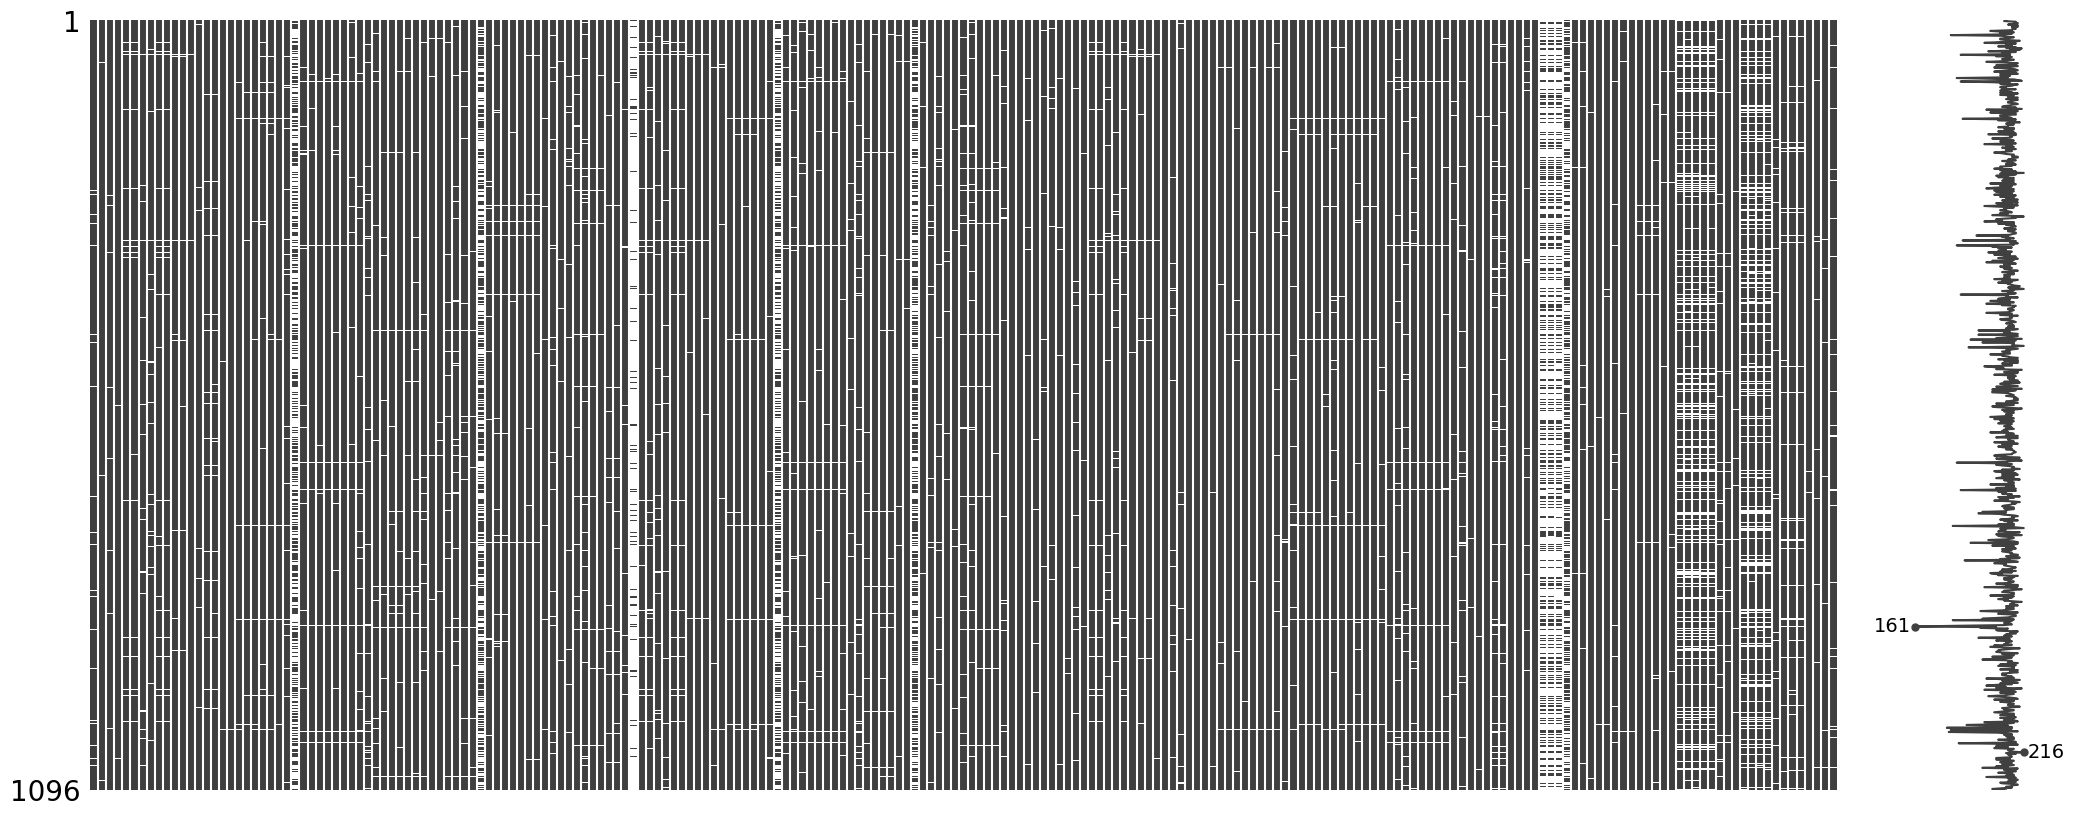

In [106]:
msno.matrix(X_train.mask(~m))
plt.show()

In [107]:
X_train.isna().sum().sort_values(ascending=False)

feature293    1002
feature518     717
feature519     714
feature517     714
feature347     577
              ... 
feature442       1
feature052       1
feature496       1
feature420       0
feature419       0
Length: 217, dtype: int64

In [108]:
X_train['feature004'].isna().sum()

29

In [109]:
ride_dup = X_train.drop_duplicates()

### Imputation of Data Using KNN

In [110]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)


train_data = pd.concat([X_train, y_train], axis=1)
train_imputed = pd.DataFrame(imputer.fit_transform(train_data),columns = train_data.columns)


In [113]:
train_imputed
y_train = train_imputed['class']
train_imputed.drop('class', axis='columns', inplace=True)
X_train = train_imputed

In [114]:
X_train.head()

,feature004,feature010,feature011,feature015,feature022,feature023,feature024,feature025,feature027,feature028,feature030,feature031,feature032,feature034,feature041,feature042,feature048,feature052,feature060,feature063,feature064,feature065,feature066,feature068,feature072,feature073,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature090,feature092,feature096,feature097,feature099,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature113,feature126,feature127,feature128,feature129,feature130,feature131,feature135,feature201,feature211,feature240,feature271,feature274,feature275,feature276,feature279,feature281,feature282,feature286,feature293,feature295,feature296,feature297,feature298,feature299,feature301,feature302,feature303,feature304,feature317,feature325,feature336,feature337,feature338,feature339,feature341,feature345,feature347,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature363,feature366,feature367,feature368,feature369,feature377,feature378,feature386,feature388,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature416,feature417,feature418,feature419,feature420,feature421,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature445,feature446,feature447,feature448,feature449,feature453,feature454,feature455,feature456,feature457,feature458,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature545,feature546,feature547,feature553,feature556,feature557,feature558,feature559,feature561,feature562,feature564,feature568,feature569,feature570,feature572,feature576,feature577,feature578,feature586,feature587,feature589,feature590
0,995.3928,0.0064,-0.0012,13.8365,-6425.50,3123.50,-5833.00,1549.50,1.8920,5.1478,2.3111,0.1417,4.6452,8.6829,16.53,4.970,1.3564,195.4163,16.4073,105.8809,21.8055,23.5927,31.6904,1.0780,116.1142,147.21172,-0.0268,-0.0318,0.0052,-0.0681,0.0497,-0.0890,-0.01490,-0.0383,0.1949,-0.0124,0.0002,0.1339,-0.3685,0.0002,-0.0002,0.0477,-0.0041,-0.0010,-0.0009,0.0009,0.0115,0.1432,0.4704,1.1720,2.618,0.7780,3.332,-0.5677,0.7025,38.0405,18.04,0.1274,0.0036,27.5274,19.2121,51.36680,0.0394,0.0009,0.0074,0.0136,4.3510,0.01530,170.7913,316.2346,1605.8234,50.9150,0.0542,0.0450,0.9365,0.3371,0.0296,6.7371,19.6809,2.2379,9.8347,1.7039,1.5886,0.0311,17.4921,4.42058,0.0411,0.0218,0.01550,0.0379,0.0274,0.0455,0.03890,0.0371,1.3533,0.0102,0.0047,0.0053,0.0034,0.0046,0.0017,0.0013,0.0130,0.0,1.3366,4.0918,2.8811,5.8689,2.3881,12.74330,7.4461,3.7412,2.5448,5.7048,385.5044,0.0000,2.6824,91.5480,1.1332,4.2418,1.5751,2.9309,3.9367,2.9866,6.3808,24.4918,61.4435,6.3892,1.9037,3.9040,43.2692,52.2353,5.3388,0.7158,0.6474,0.46820,0.5374,1.0637,0.3205,0.4236,6.2174,6.4217,7.2138,4.6968,10.5425,5.4892,3.2549,35.1736,5.8683,38.4586,6.2366,2.1448,6.4506,82.7315,26.7455,20.2712,4.4217,9.7511,6.6161,2.9140,42.2662,475.4840,154.3307,679.4258,132.4037,191.3000,103.4289,469.5652,224.9510,64.7888,2.2255,1.9403,0.2273,9.9165,16.3365,10.6074,0.0000,0.0000,124.3902,378.9474,0.13910,1.35836,1.17808,18.54820,1.8169,0.0,20.4487,0.0854,6.7783,3.9869,2.5575,8.3543,3.1646,1.1945,9.5858,0.0026,7.1160,1.27894,0.35970,62.54280,4.37888,1.58262,0.9590,0.0604,29.3353,0.7498,0.0879,3.8132,29.4844,2.3328,0.0784,1.4305,11.3765,2.7036,0.0123,0.007

In [112]:
from boruta import BorutaPy

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 8,
    class_weight='balanced'
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 50 # number of trials to perform
    , perc = 60,
    random_state=4242
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(X_train.values, y_train.values.ravel())
### print results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

In [131]:
print('Green',len(green_area))
print('week', len(blue_area))

Green 62
week 13


In [133]:
X_train = boruta.transform(X_train.values)
X_train.shape

(1096, 62)